In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
DATA_SOURCE = Path.cwd() / 'data' / 'input' / 'raw'
PROC_SOURCE = DATA_SOURCE.parent/ "processed"

# Process Raw data
Read raw data, store in consistent form

In [16]:
data_d = {}

for p in DATA_SOURCE.glob("*"):
    if p.name != ".gitkeep":
        print(p.name)
        data_d[p.name] = {f.stem: pd.read_csv(f, index_col=None) for f in p.glob("*.csv")}

N87
N49
N30
N27
3C90
3E6
78
77
3F4
.gitkeep
3C94


In [17]:
for k, v in data_d.items():
    print(k)
    for kk, vv in v.items():
        print(f"{kk} with shape {vv.shape}")
        

N87
Volumetric_losses[Wm-3] with shape (40615, 1)
Frequency[Hz] with shape (40615, 1)
B_waveform[T] with shape (40615, 1024)
Temperature[C] with shape (40615, 1)
H_waveform[Am-1] with shape (40615, 1024)
N49
Volumetric_losses[Wm-3] with shape (8601, 1)
Frequency[Hz] with shape (8601, 1)
B_waveform[T] with shape (8601, 1024)
Temperature[C] with shape (8601, 1)
H_waveform[Am-1] with shape (8601, 1024)
N30
Volumetric_losses[Wm-3] with shape (8977, 1)
Frequency[Hz] with shape (8977, 1)
B_waveform[T] with shape (8977, 1024)
Temperature[C] with shape (8977, 1)
H_waveform[Am-1] with shape (8977, 1024)
N27
Volumetric_losses[Wm-3] with shape (11395, 1)
Frequency[Hz] with shape (11395, 1)
B_waveform[T] with shape (11395, 1024)
Temperature[C] with shape (11395, 1)
H_waveform[Am-1] with shape (11395, 1024)
3C90
Volumetric_losses[Wm-3] with shape (40712, 1)
Frequency[Hz] with shape (40712, 1)
B_waveform[T] with shape (40712, 1024)
Temperature[C] with shape (40712, 1)
H_waveform[Am-1] with shape (40

In [18]:
data_d['77']['Volumetric_losses[Wm-3]']

,2348.67904947338
0,3427.045851
1,6772.981613
2,12379.944813
3,21492.763095
4,38218.806637
...,...
11438,44777.198896
11439,70886.656089
11440,109948.777331
11441,176566.721445


In [19]:
data_d['77']['H_waveform[Am-1]']

,0.232672595398258,0.275852156648965,0.339307479473925,0.373784319223428,0.427544930333855,0.462715847620422,0.507745460276564,0.555230835369981,0.603559383168559,0.660541286504179,...,-0.183896154713624,-0.140097953582489,-0.106655287818832,-0.066840445344985,-0.0356793572362766,0.0179587696995483,0.0505538218421083,0.0957427045062998,0.126733361170624,0.174720995148731
0,0.172711,0.222592,0.258779,0.295567,0.361601,0.417298,0.473350,0.538819,0.552730,0.659276,...,-0.242471,-0.229233,-0.187251,-0.132418,-0.116875,-0.076721,-0.015115,0.027960,0.063945,0.117461
1,1.207306,1.303059,1.364762,1.380317,1.476680,1.529389,1.572948,1.652259,1.676116,1.777269,...,0.630712,0.625442,0.719020,0.784175,0.862062,0.882557,0.965667,1.029181,1.107948,1.165276
2,1.733584,1.769329,1.880979,1.945082,2.000092,2.113439,2.184118,2.250676,2.295036,2.361418,...,0.999121,1.096174,1.189393,1.240996,1.319959,1.350040,1.418487,1.475970,1.559261,1.709624
3,1.811638,1.893005,1.992778,2.017534,2.138280,2.185156,2.306230,2.320959,2.448897,2.517986,...,1.029668,1.048623,1.186931,1.265834,1.325171,1.390654,1.477975,1.538740,1.634446,1.723091
4,3.335907,3.397103,3.514572,3.573229,3.675034,3.736175,3.789300,3.947331,4.034298,4.076352,...,2.434529,2.538810,2.609131,2.685823,2.796994,2.925270,2.988614,3.059116,3.160241,3.274364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11438,2.790680,2.660148,2.575144,2.462013,2.284328,2.072305,1.866548,1.707807,1.618429,1.581654,...,3.611208,4.676808,5.463471,5.841244,5.678827,5.117199,4.630791,4.042060,3.473014,3.040780
11439,3.536335,3.383269,3.221020,3.008239,2.767611,2.532029,2.334652,2.194773,2.103750,2.047932,...,5.332035,6.380517,7.005141,7.058569,6.617265,6.097846,5.403665,4.693888,4.122016,3.757006
11440,4.374225,4.109019,3.877382,3.646209,3.415638,3.190524,2.976172,2.777982,2.609053,2.485647,...,6.892653,8.092370,8.736739,8.644109,8.004929,7.434810,6.681530,5.895044,5.219722,4.726812
11441,5.512558,5.116997,4.793628,4.518408,4.274292,4.044544,3.813048,3.574009,3.352909,3.183084,...,8.984765,10.368193,11.016965,10.704472,9.788779,9.143821,8.314016,7.437332,6.646208,6.012226


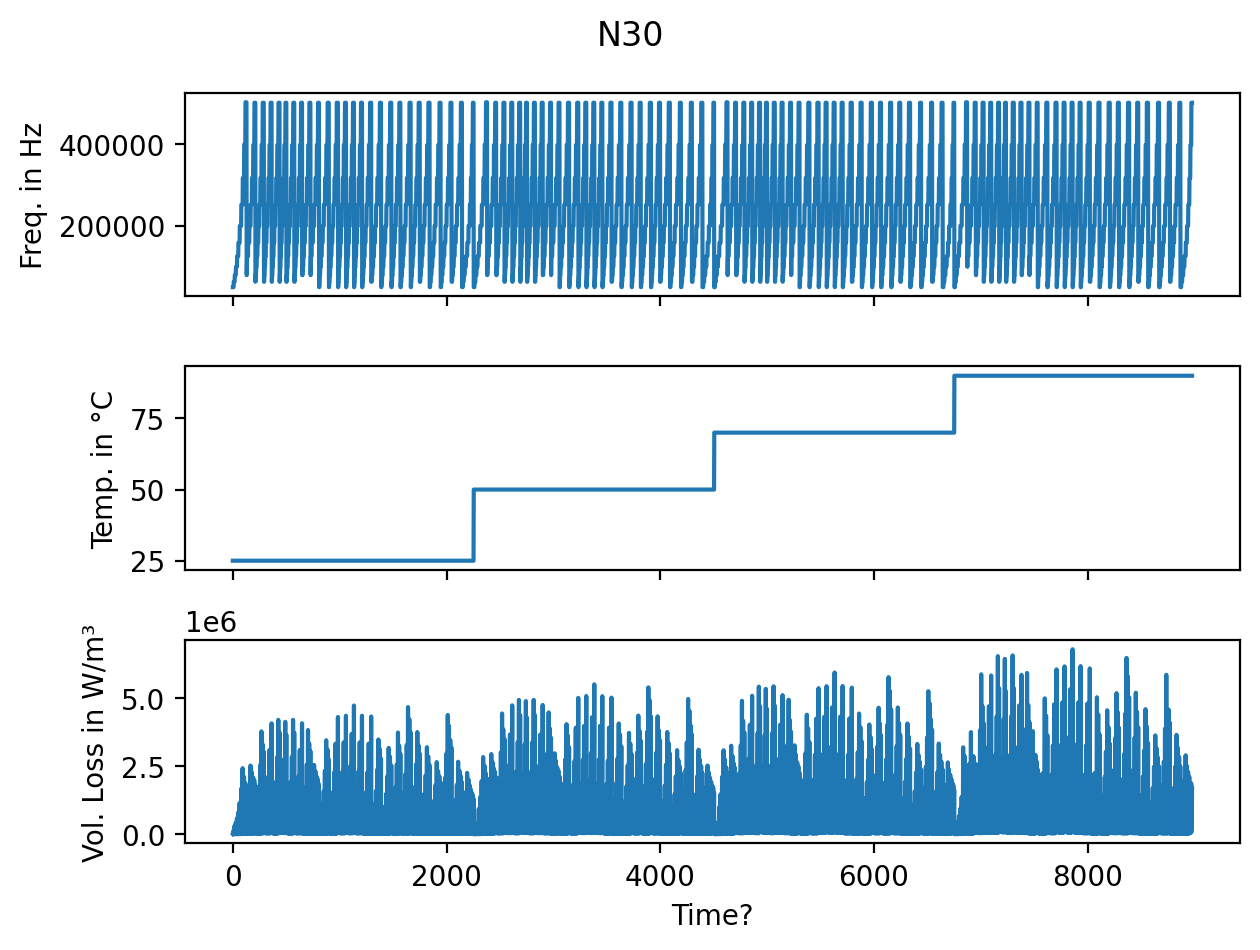

In [20]:
fig, axes = plt.subplots(3, 1, dpi=200, sharex=True)

axes[0].plot(data_d['N30']['Frequency[Hz]'].to_numpy().ravel())
axes[0].set_ylabel('Freq. in Hz')
axes[1].plot(data_d['N30']['Temperature[C]'].to_numpy().ravel())
axes[1].set_ylabel('Temp. in °C')
axes[2].plot(data_d['N30']['Volumetric_losses[Wm-3]'].to_numpy().ravel())
axes[2].set_ylabel('Vol. Loss in W/m³')

axes[2].set_xlabel('Time?')
fig.suptitle("N30")
fig.tight_layout()

In [21]:
# store compact data set
col_translation = {
"Volumetric_losses[Wm-3]": 'ploss',
"H_waveform[Am-1]": 'H',
"B_waveform[T]": 'B',
"Temperature[C]": 'temp',
"Frequency[Hz]": 'freq',}
dfs = []
for k, v in data_d.items():
    series_l = []
    for q, arr in v.items():
        if arr.shape[-1] == 1:
            df = pd.Series(arr.to_numpy().ravel(), name=col_translation[q])
        else:
            df = pd.DataFrame(arr.to_numpy(), columns=[f"{col_translation[q]}_t_{j}" for j in range(arr.shape[1])])
        series_l.append(df)
    mat_df = pd.concat(series_l, axis=1)
    mat_df.to_pickle(PROC_SOURCE / f"{k}.pkl.gz")
    dfs.append(mat_df.assign(material=k))

pd.concat(dfs, ignore_index=True).to_pickle(PROC_SOURCE / f"ten_materials.pkl.gz")

In [22]:
data_d.keys()

dict_keys(['N87', 'N49', 'N30', 'N27', '3C90', '3E6', '78', '77', '3F4', '3C94'])

In [23]:
# sanity check
pd.read_pickle(DATA_SOURCE.parent / 'processed' / "3C90.pkl.gz")

,ploss,freq,B_t_0,B_t_1,B_t_2,B_t_3,B_t_4,B_t_5,B_t_6,B_t_7,...,H_t_1014,H_t_1015,H_t_1016,H_t_1017,H_t_1018,H_t_1019,H_t_1020,H_t_1021,H_t_1022,H_t_1023
0,2319.444340,50020.0,0.000543,0.000738,0.000931,0.001125,0.001318,0.001512,0.001705,0.001899,...,0.085877,0.125880,0.165817,0.217184,0.262436,0.318943,0.356962,0.420480,0.472374,0.561112
1,3191.235893,50020.0,0.001237,0.001455,0.001672,0.001889,0.002105,0.002322,0.002539,0.002756,...,0.329500,0.351788,0.379391,0.458352,0.521983,0.605903,0.633065,0.667338,0.739250,0.801744
2,4341.086142,50020.0,-0.000301,-0.000056,0.000188,0.000433,0.000677,0.000922,0.001166,0.001411,...,0.029896,0.064875,0.128187,0.177880,0.234162,0.305163,0.380533,0.456232,0.492321,0.534606
3,5795.359190,50020.0,-0.000294,-0.000020,0.000254,0.000527,0.000801,0.001075,0.001349,0.001622,...,0.082482,0.150287,0.234407,0.308815,0.353589,0.389211,0.478962,0.594649,0.621135,0.647840
4,7813.691725,50030.0,-0.000164,0.000141,0.000447,0.000752,0.001058,0.001364,0.001669,0.001973,...,0.265148,0.317229,0.401663,0.438609,0.538218,0.618047,0.699562,0.735218,0.849940,0.949029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40707,71045.371040,446420.0,-0.012938,-0.012615,-0.012294,-0.011977,-0.011663,-0.011349,-0.011036,-0.010722,...,2.927621,5.039611,6.693369,7.627641,7.866087,7.474388,6.534628,5.274130,3.994081,2.999959
40708,89650.733233,446420.0,-0.014490,-0.014129,-0.013769,-0.013414,-0.013061,-0.012709,-0.012358,-0.012007,...,3.086461,5.415209,7.264422,8.347452,8.677777,8.313535,7.331263,5.974132,4.573158,3.464263
40709,111284.564951,446420.0,-0.016134,-0.015729,-0.015326,-0.014927,-0.014531,-0.014136,-0.013741,-0.013347,...,3.959664,6.544508,8.512177,9.549737,9.730827,9.184637,8.054542,6.602204,5.137841,3.975212
40710,141838.918696,446420.0,-0.018181,-0.017725,-0.017272,-0.016823,-0.016376,-0.015932,-0.015488,-0.015044,...,3.839224,6.711542,9.018417,10.411144,10.898817,10.544002,9.430534,7.838353,6.151887,4.761440
